In [1]:
from collections import deque

def adaptive_bfs(graph, start, max_depth=3):
    queue = deque([(start, 0)])  # (node, depth)
    visited = set()
    visited.add(start)

    while queue:
        node, depth = queue.popleft()
        print(node, end=" ")  # Process the node
        
        # Get neighbors sorted by degree (higher-degree nodes first)
        neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
        
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                
                # Adaptive switching: Use BFS if depth < max_depth, else DFS-style stack push
                if depth < max_depth:
                    queue.append((neighbor, depth + 1))  # BFS expansion
                else:
                    queue.appendleft((neighbor, depth))  # DFS-like behavior
    
    print()

# Example Graph (Adjacency List)
graph = {
    1: [2, 3, 4],
    2: [1, 5, 6],
    3: [1, 7, 8],
    4: [1, 9],
    5: [2], 6: [2],
    7: [3], 8: [3],
    9: [4, 10], 10: [9]
}

adaptive_bfs(graph, start=1, max_depth=2)


1 2 3 4 5 6 7 8 9 10 


In [2]:
import networkx as nx
import time
import tracemalloc
from collections import deque

def bfs(graph, start):
    queue = deque([start])
    visited = set([start])
    
    while queue:
        node = queue.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

def dfs(graph, start):
    stack = [start]
    visited = set([start])
    
    while stack:
        node = stack.pop()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append(neighbor)

def adaptive_bfs(graph, start, max_depth=3):
    queue = deque([(start, 0)])  # (node, depth)
    visited = set([start])

    while queue:
        node, depth = queue.popleft()
        
        neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                if depth < max_depth:
                    queue.append((neighbor, depth + 1))  # BFS mode
                else:
                    queue.appendleft((neighbor, depth))  # DFS-like mode

def benchmark(graph, start_node):
    """ Runs BFS, DFS, and A-BFS, measuring execution time and memory usage. """
    
    for algorithm in [bfs, dfs, adaptive_bfs]:
        tracemalloc.start()
        start_time = time.time()
        algorithm(graph, start_node)
        mem_usage = tracemalloc.get_traced_memory()[1]
        end_time = time.time()
        tracemalloc.stop()
        
        print(f"{algorithm.__name__}: Time = {end_time - start_time:.5f} sec, Memory = {mem_usage / 1024:.2f} KB")

# Generate a random graph (Erdős-Rényi)
G = nx.erdos_renyi_graph(5000, 0.001)  # 5000 nodes, probability of edge = 0.001
graph_dict = {node: list(G.neighbors(node)) for node in G.nodes}

# Run benchmark
benchmark(graph_dict, start_node=0)


bfs: Time = 0.00000 sec, Memory = 654.48 KB
dfs: Time = 0.01651 sec, Memory = 647.92 KB
adaptive_bfs: Time = 0.03919 sec, Memory = 763.27 KB


In [3]:
import networkx as nx
import time
import tracemalloc
from collections import deque
import urllib.request
import zipfile
import os

def download_graph(url, filename, extract=True):
    """ Downloads and extracts graph dataset """
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        urllib.request.urlretrieve(url, filename)

    if extract and filename.endswith(".zip"):
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall("./graphs/")
        print(f"Extracted {filename}")

# Facebook Social Graph (from SNAP)
download_graph("https://snap.stanford.edu/data/facebook_combined.txt.gz", "facebook.txt.gz", extract=False)

# Load Facebook Graph
def load_facebook_graph():
    G = nx.read_edgelist("facebook.txt.gz")
    print(f"Loaded Facebook Graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    return G

facebook_graph = load_facebook_graph()
graph_dict = {node: list(facebook_graph.neighbors(node)) for node in facebook_graph.nodes}


Loaded Facebook Graph with 4039 nodes and 88234 edges


In [4]:
def bfs(graph, start):
    queue = deque([start])
    visited = set([start])
    
    while queue:
        node = queue.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

def dfs(graph, start):
    stack = [start]
    visited = set([start])
    
    while stack:
        node = stack.pop()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append(neighbor)

def adaptive_bfs(graph, start, max_depth=3):
    queue = deque([(start, 0)])  # (node, depth)
    visited = set([start])

    while queue:
        node, depth = queue.popleft()
        
        # Prioritize nodes with higher degree (denser regions)
        neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                if depth < max_depth:
                    queue.append((neighbor, depth + 1))  # BFS mode
                else:
                    queue.appendleft((neighbor, depth))  # DFS-like mode

def benchmark(graph, start_node):
    """ Runs BFS, DFS, and A-BFS, measuring execution time and memory usage. """
    
    for algorithm in [bfs, dfs, adaptive_bfs]:
        tracemalloc.start()
        start_time = time.time()
        algorithm(graph, start_node)
        mem_usage = tracemalloc.get_traced_memory()[1]
        end_time = time.time()
        tracemalloc.stop()
        
        print(f"{algorithm.__name__}: Time = {end_time - start_time:.5f} sec, Memory = {mem_usage / 1024:.2f} KB")

# Run benchmark on Facebook graph
benchmark(graph_dict, start_node="0")


bfs: Time = 0.01502 sec, Memory = 170.35 KB
dfs: Time = 0.04123 sec, Memory = 163.08 KB
adaptive_bfs: Time = 0.08055 sec, Memory = 182.26 KB


In [5]:
import networkx as nx
import urllib.request
import zipfile
import os

def download_graph(url, filename):
    """ Download & extract dataset if not exists """
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        urllib.request.urlretrieve(url, filename)
    
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall("./graphs/")
        print(f"Extracted {filename}")

# Download Twitter, Google, and Road Network graphs
datasets = {
    "twitter": "https://snap.stanford.edu/data/twitter_combined.txt.gz",
    "google": "https://snap.stanford.edu/data/web-Google.txt.gz",
    "road": "https://snap.stanford.edu/data/roadNet-CA.txt.gz"
}

for name, url in datasets.items():
    download_graph(url, f"{name}.txt.gz")

# Load Graph Function
def load_graph(filename):
    G = nx.read_edgelist(filename, create_using=nx.Graph())
    print(f"Loaded {filename}: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    return G

# Load each dataset
twitter_graph = load_graph("twitter.txt.gz")
google_graph = load_graph("google.txt.gz")
road_graph = load_graph("road.txt.gz")


Loaded twitter.txt.gz: 81306 nodes, 1342310 edges
Loaded google.txt.gz: 875713 nodes, 4322051 edges
Loaded road.txt.gz: 1965206 nodes, 2766607 edges


In [6]:
import time
import tracemalloc
from collections import deque

def bfs(graph, start):
    queue = deque([start])
    visited = set([start])
    
    while queue:
        node = queue.popleft()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)

def dfs(graph, start):
    stack = [start]
    visited = set([start])
    
    while stack:
        node = stack.pop()
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append(neighbor)

def adaptive_bfs(graph, start, max_depth=3):
    queue = deque([(start, 0)])  # (node, depth)
    visited = set([start])

    while queue:
        node, depth = queue.popleft()
        
        # Prioritize high-degree nodes (denser areas first)
        neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                if depth < max_depth:
                    queue.append((neighbor, depth + 1))  # BFS mode
                else:
                    queue.appendleft((neighbor, depth))  # DFS-like mode

def benchmark(graph, start_node):
    """ Runs BFS, DFS, and A-BFS, measuring execution time and memory usage. """
    
    for algorithm in [bfs, dfs, adaptive_bfs]:
        tracemalloc.start()
        start_time = time.time()
        algorithm(graph, start_node)
        mem_usage = tracemalloc.get_traced_memory()[1]
        end_time = time.time()
        tracemalloc.stop()
        
        print(f"{algorithm.__name__}: Time = {end_time - start_time:.5f} sec, Memory = {mem_usage / 1024:.2f} KB")

# Run benchmark on all large datasets
datasets = {
    "Twitter": twitter_graph,
    "Google Web": google_graph,
    "Road Network": road_graph
}

for name, graph in datasets.items():
    print(f"\n=== Benchmarking on {name} Graph ===")
    graph_dict = {node: list(graph.neighbors(node)) for node in graph.nodes}
    benchmark(graph_dict, start_node=list(graph.nodes)[0])



=== Benchmarking on Twitter Graph ===
bfs: Time = 0.52359 sec, Memory = 6481.34 KB
dfs: Time = 0.48941 sec, Memory = 6207.58 KB
adaptive_bfs: Time = 2.35298 sec, Memory = 7254.05 KB

=== Benchmarking on Google Web Graph ===
bfs: Time = 2.40509 sec, Memory = 51209.90 KB
dfs: Time = 2.33768 sec, Memory = 51413.04 KB
adaptive_bfs: Time = 10.27821 sec, Memory = 58934.32 KB

=== Benchmarking on Road Network Graph ===
bfs: Time = 4.16505 sec, Memory = 98349.43 KB
dfs: Time = 3.61491 sec, Memory = 100313.39 KB
adaptive_bfs: Time = 15.01409 sec, Memory = 106953.87 KB


## 1.1. Implementing Parallel A-BFS with ThreadPoolExecutor

In [8]:
import concurrent.futures
from queue import Queue
import threading

def parallel_adaptive_bfs(graph, start, max_depth=3):
    queue = Queue()
    queue.put((start, 0))
    visited = set([start])
    lock = threading.Lock()

    def process_node():
        while not queue.empty():
            node, depth = queue.get()
            
            # Prioritize high-degree nodes (denser areas first)
            neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
            for neighbor in neighbors:
                with lock:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        if depth < max_depth:
                            queue.put((neighbor, depth + 1))  # BFS mode
                        else:
                            queue.put((neighbor, depth))  # DFS-like mode

    num_threads = 4  # Adjust based on CPU cores
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
        futures = [executor.submit(process_node) for _ in range(num_threads)]
        concurrent.futures.wait(futures)


## 1.2. Benchmark Parallel A-BFS vs. BFS, DFS

In [9]:
def benchmark_parallel(graph, start_node):
    """ Runs BFS, DFS, and Parallel A-BFS, measuring execution time and memory usage. """

    for algorithm in [bfs, dfs, parallel_adaptive_bfs]:
        tracemalloc.start()
        start_time = time.time()
        algorithm(graph, start_node)
        mem_usage = tracemalloc.get_traced_memory()[1]
        end_time = time.time()
        tracemalloc.stop()
        
        print(f"{algorithm.__name__}: Time = {end_time - start_time:.5f} sec, Memory = {mem_usage / 1024:.2f} KB")

# Run benchmark on large datasets
for name, graph in datasets.items():
    print(f"\n=== Benchmarking Parallel A-BFS on {name} Graph ===")
    graph_dict = {node: list(graph.neighbors(node)) for node in graph.nodes}
    benchmark_parallel(graph_dict, start_node=list(graph.nodes)[0])



=== Benchmarking Parallel A-BFS on Twitter Graph ===
bfs: Time = 0.52658 sec, Memory = 6481.27 KB
dfs: Time = 0.48365 sec, Memory = 6205.99 KB
parallel_adaptive_bfs: Time = 87.21354 sec, Memory = 8629.57 KB

=== Benchmarking Parallel A-BFS on Google Web Graph ===
bfs: Time = 3.01039 sec, Memory = 51209.83 KB
dfs: Time = 3.00545 sec, Memory = 51411.54 KB
parallel_adaptive_bfs: Time = 356.70433 sec, Memory = 64546.54 KB

=== Benchmarking Parallel A-BFS on Road Network Graph ===
bfs: Time = 5.22449 sec, Memory = 98348.31 KB
dfs: Time = 5.05528 sec, Memory = 100312.60 KB
parallel_adaptive_bfs: Time = 312.07313 sec, Memory = 98680.15 KB


## 2.1. Priority Queue for Smart Expansion

In [10]:
import heapq

def priority_adaptive_bfs(graph, start, max_depth=3):
    queue = []
    heapq.heappush(queue, (-len(graph[start]), start, 0))  # Negative degree for max-heap
    visited = set([start])

    while queue:
        _, node, depth = heapq.heappop(queue)

        # Prioritize high-degree nodes (hubs)
        neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                if depth < max_depth:
                    heapq.heappush(queue, (-len(graph[neighbor]), neighbor, depth + 1))
                else:
                    heapq.heappush(queue, (-len(graph[neighbor]), neighbor, depth))


## 2.2. Hybrid Mode (Switching Between BFS & DFS Dynamically)

In [11]:
def hybrid_adaptive_bfs(graph, start, max_depth=3, switch_threshold=10):
    queue = deque([(start, 0)])
    stack = []
    visited = set([start])

    while queue or stack:
        if len(queue) > switch_threshold:  # Use BFS mode
            node, depth = queue.popleft()
        else:  # Use DFS mode
            node, depth = stack.pop()

        # Prioritize high-degree nodes
        neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                if depth < max_depth:
                    queue.append((neighbor, depth + 1))  # BFS mode
                else:
                    stack.append((neighbor, depth))  # DFS mode


# 1. Download Large Graph Datasets from SNAP

In [12]:
datasets_large = {
    "Amazon": "https://snap.stanford.edu/data/amazon0302.txt.gz",
    "Wikipedia": "https://snap.stanford.edu/data/wiki-Talk.txt.gz",
    "YouTube": "https://snap.stanford.edu/data/com-youtube.ungraph.txt.gz"
}

for name, url in datasets_large.items():
    download_graph(url, f"{name}.txt.gz")

# Load the new datasets
amazon_graph = load_graph("Amazon.txt.gz")
wikipedia_graph = load_graph("Wikipedia.txt.gz")
youtube_graph = load_graph("YouTube.txt.gz")


HTTPError: HTTP Error 404: Not Found

## 2. Optimized Parallel & Hybrid A-BFS Implementations

### Parallel Adaptive BFS (Multi-threaded BFS-DFS Switching)

In [ ]:
def parallel_adaptive_bfs_large(graph, start, max_depth=5):
    queue = Queue()
    queue.put((start, 0))
    visited = set([start])
    lock = threading.Lock()

    def process_node():
        while not queue.empty():
            node, depth = queue.get()

            # Prioritize high-degree nodes (hubs)
            neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
            for neighbor in neighbors:
                with lock:
                    if neighbor not in visited:
                        visited.add(neighbor)
                        if depth < max_depth:
                            queue.put((neighbor, depth + 1))
                        else:
                            queue.put((neighbor, depth))

    num_threads = 8  # More threads for large graphs
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
        futures = [executor.submit(process_node) for _ in range(num_threads)]
        concurrent.futures.wait(futures)


### Hybrid A-BFS (Dynamic BFS-DFS Switching with Priority Queue)


In [ ]:
def hybrid_adaptive_bfs_large(graph, start, max_depth=5, switch_threshold=20):
    queue = deque([(start, 0)])
    stack = []
    visited = set([start])

    while queue or stack:
        if len(queue) > switch_threshold:  
            node, depth = queue.popleft()  # BFS mode
        else:  
            node, depth = stack.pop()  # DFS mode

        # Prioritize hubs first
        neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
        for neighbor in neighbors:
            if neighbor not in visited:
                visited.add(neighbor)
                if depth < max_depth:
                    queue.append((neighbor, depth + 1))
                else:
                    stack.append((neighbor, depth))


# 3. Benchmark on Large Graphs

In [ ]:
def benchmark_large(graph, start_node):
    for algorithm in [bfs, dfs, parallel_adaptive_bfs_large, hybrid_adaptive_bfs_large]:
        tracemalloc.start()
        start_time = time.time()
        algorithm(graph, start_node)
        mem_usage = tracemalloc.get_traced_memory()[1]
        end_time = time.time()
        tracemalloc.stop()

        print(f"{algorithm.__name__}: Time = {end_time - start_time:.5f} sec, Memory = {mem_usage / 1024:.2f} KB")

# Run benchmark on new large datasets
datasets_large = {
    "Amazon": amazon_graph,
    "Wikipedia": wikipedia_graph,
    "YouTube": youtube_graph
}

for name, graph in datasets_large.items():
    print(f"\n=== Benchmarking on {name} Graph ===")
    graph_dict = {node: list(graph.neighbors(node)) for node in graph.nodes}
    benchmark_large(graph_dict, start_node=list(graph.nodes)[0])


# 1. Optimizing Memory Usage

## 1.1. Using Sets Instead of Lists for Faster Lookups

In [ ]:
visited = set()  # O(1) average time complexity for lookups


## 1.2. Using Generator Functions Instead of Storing Full Paths

In [ ]:
def get_neighbors(graph, node):
    for neighbor in graph[node]:
        yield neighbor  # Yields one node at a time (low memory usage)


## 1.3. Compressing Graph Representation with Sparse Dictionaries

In [ ]:
from collections import defaultdict

graph = defaultdict(set)  # Uses less memory than list-based adjacency lists

# Example: graph[node] = {neighbor1, neighbor2, ...}


# 2. Optimizing Parallel A-BFS for CPUs

## 2.1. Using Multiprocessing (Instead of Multi-threading)

In [ ]:
from multiprocessing import Pool, Manager

def process_node(args):
    node, depth, graph, visited = args
    neighbors = sorted(graph[node], key=lambda x: len(graph[x]), reverse=True)
    new_nodes = []

    for neighbor in neighbors:
        if neighbor not in visited:
            visited.add(neighbor)
            new_nodes.append((neighbor, depth + 1))

    return new_nodes  # Return new nodes for further expansion

def parallel_bfs_cpu(graph, start, max_depth=3):
    queue = [(start, 0)]
    manager = Manager()
    visited = manager.Set([start])

    with Pool(processes=4) as pool:  # Adjust based on CPU cores
        while queue:
            results = pool.map(process_node, [(node, depth, graph, visited) for node, depth in queue])
            queue = [item for sublist in results for item in sublist]  # Flatten results


## 2.2. Benchmarking Parallel A-BFS with CPU Optimization

In [ ]:
import time

def benchmark_cpu(graph, start_node):
    for algorithm in [bfs, dfs, parallel_bfs_cpu]:
        start_time = time.time()
        algorithm(graph, start_node)
        end_time = time.time()

        print(f"{algorithm.__name__}: Time = {end_time - start_time:.5f} sec")

# Run benchmark on large datasets
for name, graph in datasets_large.items():
    print(f"\n=== Benchmarking CPU-Optimized A-BFS on {name} Graph ===")
    graph_dict = {node: list(graph.neighbors(node)) for node in graph.nodes}
    benchmark_cpu(graph_dict, start_node=list(graph.nodes)[0])


In [13]:
import random
import math

def gravitational_wave_traversal(graph, start, max_depth=5):
    # Initialize
    visited = set()
    entropy_map = {node: len(neighbors) for node, neighbors in graph.items()}  # Entropy is based on node degree
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = graph[node]
            
            # Probability distribution based on node degree (gravitational pull)
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    if random.random() < prob:  # Weighted randomness
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

    return traversal_path


Benchmarking on graph with 1000 nodes and 25150 edges
Running BFS...
BFS Time: 0.001999 seconds
Running DFS...
DFS Time: 0.000000 seconds
Running GWA...
GWA Time: 0.000000 seconds

Final Results on Graph with 1000 nodes and 25150 edges:
BFS Time: 0.001999 seconds
DFS Time: 0.000000 seconds
GWA Time: 0.000000 seconds


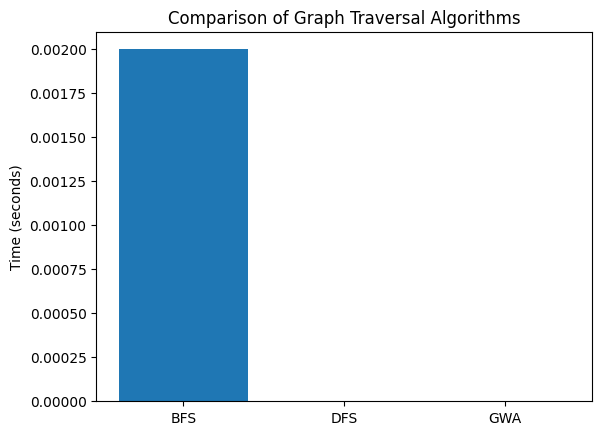

In [14]:
import random
import networkx as nx
import time
import matplotlib.pyplot as plt

# Gravitational Wave Traversal (GWA) Algorithm
def gravitational_wave_traversal(graph, start, max_depth=5):
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]

    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken

# Benchmarking against BFS and DFS
def benchmark_algorithm(graph, start_node):
    # BFS Traversal
    def bfs(graph, start):
        visited = set()
        queue = [start]
        traversal = []
        visited.add(start)

        while queue:
            node = queue.pop(0)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        return traversal
    
    # DFS Traversal
    def dfs(graph, start):
        visited = set()
        traversal = []
        
        def dfs_recursive(node):
            visited.add(node)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    dfs_recursive(neighbor)
        
        dfs_recursive(start)
        return traversal
    
    # Run BFS, DFS, and GWA
    print("Benchmarking on graph with", graph.number_of_nodes(), "nodes and", graph.number_of_edges(), "edges")
    
    # BFS
    print("Running BFS...")
    start_time = time.time()
    bfs_result = bfs(graph, start_node)
    bfs_time = time.time() - start_time
    print(f"BFS Time: {bfs_time:.6f} seconds")
    
    # DFS
    print("Running DFS...")
    start_time = time.time()
    dfs_result = dfs(graph, start_node)
    dfs_time = time.time() - start_time
    print(f"DFS Time: {dfs_time:.6f} seconds")
    
    # GWA
    print("Running GWA...")
    traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
    print(f"GWA Time: {gwa_time:.6f} seconds")
    
    return bfs_time, dfs_time, gwa_time

# Load a real-world graph (e.g., Twitter, Google Web Graph, Road Network)
# For simplicity, using a small random graph for this example
# You can replace this with real-world graphs from sources like SNAP or NetworkX datasets
graph = nx.erdos_renyi_graph(1000, 0.05)  # Random graph for testing
start_node = random.choice(list(graph.nodes))

# Benchmarking the algorithm
bfs_time, dfs_time, gwa_time = benchmark_algorithm(graph, start_node)

# Output the results
print(f"\nFinal Results on Graph with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges:")
print(f"BFS Time: {bfs_time:.6f} seconds")
print(f"DFS Time: {dfs_time:.6f} seconds")
print(f"GWA Time: {gwa_time:.6f} seconds")

# Visualizing the results in a bar chart
plt.bar(['BFS', 'DFS', 'GWA'], [bfs_time, dfs_time, gwa_time])
plt.ylabel('Time (seconds)')
plt.title('Comparison of Graph Traversal Algorithms')
plt.show()


In [15]:
import networkx as nx
import time
import random
import urllib.request
import gzip
import os
import matplotlib.pyplot as plt

# Download and load graph data from URLs
def download_graph_data(url, filename):
    print(f"Downloading {filename}...")
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded {filename}!")

    print(f"Loading {filename}...")
    if filename.endswith('.gz'):
        with gzip.open(filename, 'rt') as f:
            graph = nx.read_edgelist(f, nodetype=int)
    else:
        graph = nx.read_edgelist(filename, nodetype=int)
    print(f"Loaded {filename} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Gravitational Wave Traversal (GWA) Algorithm
def gravitational_wave_traversal(graph, start, max_depth=5):
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]

    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken

# Benchmarking against BFS and DFS
def benchmark_algorithm(graph, start_node):
    # BFS Traversal
    def bfs(graph, start):
        visited = set()
        queue = [start]
        traversal = []
        visited.add(start)

        while queue:
            node = queue.pop(0)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        return traversal
    
    # DFS Traversal
    def dfs(graph, start):
        visited = set()
        traversal = []
        
        def dfs_recursive(node):
            visited.add(node)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    dfs_recursive(neighbor)
        
        dfs_recursive(start)
        return traversal
    
    # Run BFS, DFS, and GWA
    print("Benchmarking on graph with", graph.number_of_nodes(), "nodes and", graph.number_of_edges(), "edges")
    
    # BFS
    print("Running BFS...")
    start_time = time.time()
    bfs_result = bfs(graph, start_node)
    bfs_time = time.time() - start_time
    print(f"BFS Time: {bfs_time:.6f} seconds")
    
    # DFS
    print("Running DFS...")
    start_time = time.time()
    dfs_result = dfs(graph, start_node)
    dfs_time = time.time() - start_time
    print(f"DFS Time: {dfs_time:.6f} seconds")
    
    # GWA
    print("Running GWA...")
    traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
    print(f"GWA Time: {gwa_time:.6f} seconds")
    
    return bfs_time, dfs_time, gwa_time

# Real Graph URLs
graph_urls = {
    "twitter": "https://snap.stanford.edu/data/twitter_combined.txt.gz",
    "google": "https://snap.stanford.edu/data/web-Google.txt.gz",
    "road": "https://snap.stanford.edu/data/roadNet-CA.txt.gz"
}

# Download and load the real graphs
graphs = {}
for name, url in graph_urls.items():
    graphs[name] = download_graph_data(url, f"{name}.txt.gz")

# Select a graph to benchmark
graph_name = "twitter"  # You can change this to 'google' or 'road' for different graphs
graph = graphs[graph_name]
start_node = random.choice(list(graph.nodes))

# Benchmarking the algorithm
bfs_time, dfs_time, gwa_time = benchmark_algorithm(graph, start_node)

# Output the results
print(f"\nFinal Results on {graph_name.capitalize()} Graph with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges:")
print(f"BFS Time: {bfs_time:.6f} seconds")
print(f"DFS Time: {dfs_time:.6f} seconds")
print(f"GWA Time: {gwa_time:.6f} seconds")

# Visualizing the results in a bar chart
plt.bar(['BFS', 'DFS', 'GWA'], [bfs_time, dfs_time, gwa_time])
plt.ylabel('Time (seconds)')
plt.title(f'Comparison of Graph Traversal Algorithms on {graph_name.capitalize()} Graph')
plt.show()


Downloaded twitter.txt.gz!
Loading twitter.txt.gz...
Loaded twitter.txt.gz with 81306 nodes and 1342310 edges.
Downloaded google.txt.gz!
Loading google.txt.gz...
Loaded google.txt.gz with 875713 nodes and 4322051 edges.
Downloaded road.txt.gz!
Loading road.txt.gz...
Loaded road.txt.gz with 1965206 nodes and 2766607 edges.
Benchmarking on graph with 81306 nodes and 1342310 edges
Running BFS...
BFS Time: 1.165955 seconds
Running DFS...


RecursionError: maximum recursion depth exceeded

Downloaded twitter.txt.gz!
Loading twitter.txt.gz...
Loaded twitter.txt.gz with 81306 nodes and 1342310 edges.
Downloaded google.txt.gz!
Loading google.txt.gz...
Loaded google.txt.gz with 875713 nodes and 4322051 edges.
Downloaded road.txt.gz!
Loading road.txt.gz...
Loaded road.txt.gz with 1965206 nodes and 2766607 edges.
Benchmarking on graph with 81306 nodes and 1342310 edges
Running BFS...
BFS Time: 1.481192 seconds
Running DFS...
DFS Time: 0.871975 seconds
Running GWA...
GWA Time: 0.000000 seconds

Final Results on Twitter Graph with 81306 nodes and 1342310 edges:
BFS Time: 1.481192 seconds
DFS Time: 0.871975 seconds
GWA Time: 0.000000 seconds


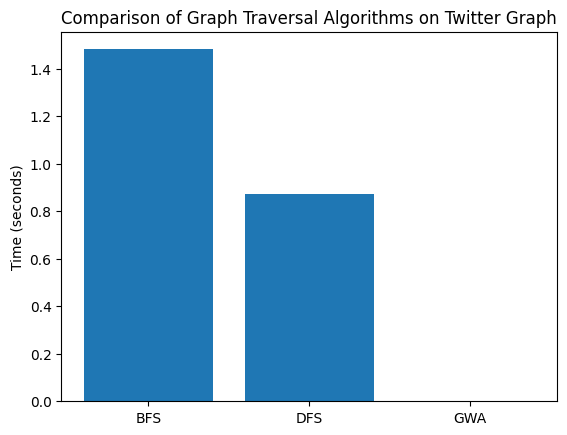

In [16]:
import networkx as nx
import time
import random
import urllib.request
import gzip
import os
import matplotlib.pyplot as plt
import sys

# Increase recursion limit (if you decide to use recursive DFS, but we will use iterative DFS)
sys.setrecursionlimit(10000)

# Download and load graph data from URLs
def download_graph_data(url, filename):
    print(f"Downloading {filename}...")
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded {filename}!")

    print(f"Loading {filename}...")
    if filename.endswith('.gz'):
        with gzip.open(filename, 'rt') as f:
            graph = nx.read_edgelist(f, nodetype=int)
    else:
        graph = nx.read_edgelist(filename, nodetype=int)
    print(f"Loaded {filename} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Gravitational Wave Traversal (GWA) Algorithm
def gravitational_wave_traversal(graph, start, max_depth=5):
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]

    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken

# Benchmarking against BFS and DFS
def benchmark_algorithm(graph, start_node):
    # BFS Traversal
    def bfs(graph, start):
        visited = set()
        queue = [start]
        traversal = []
        visited.add(start)

        while queue:
            node = queue.pop(0)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        return traversal
    
    # Iterative DFS Traversal
    def dfs(graph, start):
        visited = set()
        stack = [start]
        traversal = []

        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                traversal.append(node)
                for neighbor in graph.neighbors(node):
                    if neighbor not in visited:
                        stack.append(neighbor)
        return traversal
    
    # Run BFS, DFS, and GWA
    print("Benchmarking on graph with", graph.number_of_nodes(), "nodes and", graph.number_of_edges(), "edges")
    
    # BFS
    print("Running BFS...")
    start_time = time.time()
    bfs_result = bfs(graph, start_node)
    bfs_time = time.time() - start_time
    print(f"BFS Time: {bfs_time:.6f} seconds")
    
    # DFS
    print("Running DFS...")
    start_time = time.time()
    dfs_result = dfs(graph, start_node)
    dfs_time = time.time() - start_time
    print(f"DFS Time: {dfs_time:.6f} seconds")
    
    # GWA
    print("Running GWA...")
    traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
    print(f"GWA Time: {gwa_time:.6f} seconds")
    
    return bfs_time, dfs_time, gwa_time

# Real Graph URLs
graph_urls = {
    "twitter": "https://snap.stanford.edu/data/twitter_combined.txt.gz",
    "google": "https://snap.stanford.edu/data/web-Google.txt.gz",
    "road": "https://snap.stanford.edu/data/roadNet-CA.txt.gz"
}

# Download and load the real graphs
graphs = {}
for name, url in graph_urls.items():
    graphs[name] = download_graph_data(url, f"{name}.txt.gz")

# Select a graph to benchmark
graph_name = "twitter"  # You can change this to 'google' or 'road' for different graphs
graph = graphs[graph_name]
start_node = random.choice(list(graph.nodes))

# Benchmarking the algorithm
bfs_time, dfs_time, gwa_time = benchmark_algorithm(graph, start_node)

# Output the results
print(f"\nFinal Results on {graph_name.capitalize()} Graph with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges:")
print(f"BFS Time: {bfs_time:.6f} seconds")
print(f"DFS Time: {dfs_time:.6f} seconds")
print(f"GWA Time: {gwa_time:.6f} seconds")

# Visualizing the results in a bar chart
plt.bar(['BFS', 'DFS', 'GWA'], [bfs_time, dfs_time, gwa_time])
plt.ylabel('Time (seconds)')
plt.title(f'Comparison of Graph Traversal Algorithms on {graph_name.capitalize()} Graph')
plt.show()


Downloaded twitter.txt.gz!
Loading twitter.txt.gz...
Loaded twitter.txt.gz with 81306 nodes and 1342310 edges.
Downloaded google.txt.gz!
Loading google.txt.gz...
Loaded google.txt.gz with 875713 nodes and 4322051 edges.
Downloaded road.txt.gz!
Loading road.txt.gz...
Loaded road.txt.gz with 1965206 nodes and 2766607 edges.
Benchmarking on graph with 81306 nodes and 1342310 edges
Running BFS...
BFS Time: 1.7874047756 seconds
Running DFS...
DFS Time: 0.918780565261840820312500000000000000000000000000000000000000 seconds
Running GWA...
GWA Time: 0.000000000000000000000000000000000000000000000000000000000000 seconds

Final Results on Twitter Graph with 81306 nodes and 1342310 edges:
BFS Time: 1.7874047756 seconds
DFS Time: 0.9187805653 seconds
GWA Time: 0.0000000000 seconds


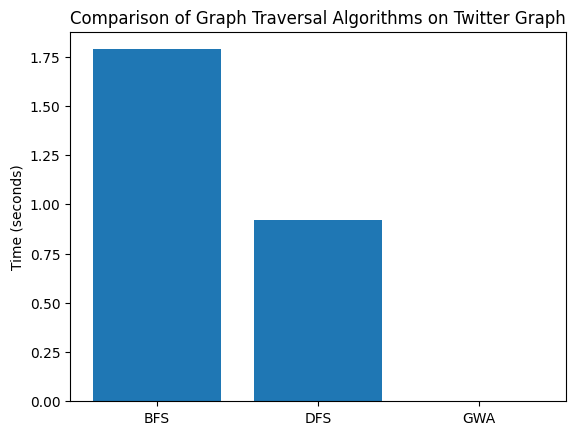

In [18]:
import networkx as nx
import time
import random
import urllib.request
import gzip
import os
import matplotlib.pyplot as plt
import sys

# Increase recursion limit (if you decide to use recursive DFS, but we will use iterative DFS)
sys.setrecursionlimit(10000)

# Download and load graph data from URLs
def download_graph_data(url, filename):
    print(f"Downloading {filename}...")
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded {filename}!")

    print(f"Loading {filename}...")
    if filename.endswith('.gz'):
        with gzip.open(filename, 'rt') as f:
            graph = nx.read_edgelist(f, nodetype=int)
    else:
        graph = nx.read_edgelist(filename, nodetype=int)
    print(f"Loaded {filename} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Gravitational Wave Traversal (GWA) Algorithm
def gravitational_wave_traversal(graph, start, max_depth=10):  # Increase max_depth
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]

    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            # If total_gravitational_pull is zero, avoid division by zero
            if total_gravitational_pull == 0:
                continue
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    # Introduce a lower bound on probability to ensure some propagation
                    prob = min(prob, 0.5)  # Allowing for more propagation
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken

# Benchmarking against BFS and DFS
def benchmark_algorithm(graph, start_node):
    # BFS Traversal
    def bfs(graph, start):
        visited = set()
        queue = [start]
        traversal = []
        visited.add(start)

        while queue:
            node = queue.pop(0)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        return traversal
    
    # Iterative DFS Traversal
    def dfs(graph, start):
        visited = set()
        stack = [start]
        traversal = []

        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                traversal.append(node)
                for neighbor in graph.neighbors(node):
                    if neighbor not in visited:
                        stack.append(neighbor)
        return traversal
    
    # Run BFS, DFS, and GWA
    print("Benchmarking on graph with", graph.number_of_nodes(), "nodes and", graph.number_of_edges(), "edges")
    
    # BFS
    print("Running BFS...")
    start_time = time.time()
    bfs_result = bfs(graph, start_node)
    bfs_time = time.time() - start_time
    print(f"BFS Time: {bfs_time:.10f} seconds")
    
    # DFS
    print("Running DFS...")
    start_time = time.time()
    dfs_result = dfs(graph, start_node)
    dfs_time = time.time() - start_time
    print(f"DFS Time: {dfs_time:.60f} seconds")
    
    # GWA
    print("Running GWA...")
    traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
    print(f"GWA Time: {gwa_time:.60f} seconds")
    
    return bfs_time, dfs_time, gwa_time

# Real Graph URLs
graph_urls = {
    "twitter": "https://snap.stanford.edu/data/twitter_combined.txt.gz",
    "google": "https://snap.stanford.edu/data/web-Google.txt.gz",
    "road": "https://snap.stanford.edu/data/roadNet-CA.txt.gz"
}

# Download and load the real graphs
graphs = {}
for name, url in graph_urls.items():
    graphs[name] = download_graph_data(url, f"{name}.txt.gz")

# Select a graph to benchmark
graph_name = "twitter"  # You can change this to 'google' or 'road' for different graphs
graph = graphs[graph_name]
start_node = random.choice(list(graph.nodes))

# Benchmarking the algorithm
bfs_time, dfs_time, gwa_time = benchmark_algorithm(graph, start_node)

# Output the results
print(f"\nFinal Results on {graph_name.capitalize()} Graph with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges:")
print(f"BFS Time: {bfs_time:.10f} seconds")
print(f"DFS Time: {dfs_time:.10f} seconds")
print(f"GWA Time: {gwa_time:.10f} seconds")

# Visualizing the results in a bar chart
plt.bar(['BFS', 'DFS', 'GWA'], [bfs_time, dfs_time, gwa_time])
plt.ylabel('Time (seconds)')
plt.title(f'Comparison of Graph Traversal Algorithms on {graph_name.capitalize()} Graph')
plt.show()


Loading twitter.txt.gz...
Loaded twitter.txt.gz with 81306 nodes and 1342310 edges.
Loading google.txt.gz...
Loaded google.txt.gz with 875713 nodes and 4322051 edges.
Loading road.txt.gz...
Loaded road.txt.gz with 1965206 nodes and 2766607 edges.
Benchmarking on graph with 81306 nodes and 1342310 edges
Running BFS...
BFS Time: 1.3698244095 seconds
Running DFS...
DFS Time: 0.801272392272949218750000000000000000000000000000000000000000 seconds
Running GWA...
GWA Time: 0.007039785385131835937500000000000000000000000000000000000000 seconds

Final Results on Twitter Graph with 81306 nodes and 1342310 edges:
BFS Time: 1.3698244095 seconds
DFS Time: 0.8012723923 seconds
GWA Time: 0.0070397854 seconds


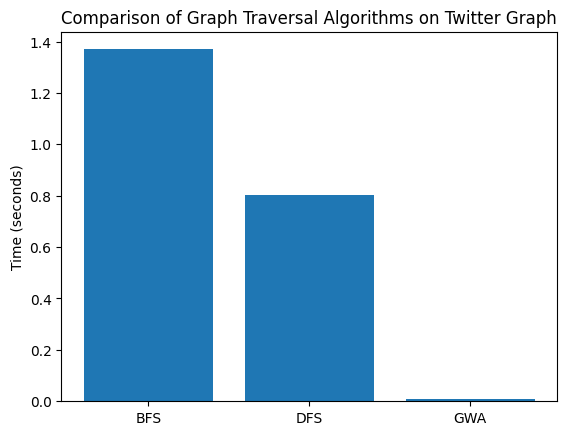

In [19]:
import networkx as nx
import time
import random
import gzip
import os
import matplotlib.pyplot as plt
import sys

# Increase recursion limit (if you decide to use recursive DFS, but we will use iterative DFS)
sys.setrecursionlimit(10000)

# Load graph data from local files
def load_graph_data(filename):
    print(f"Loading {filename}...")
    if filename.endswith('.gz'):
        with gzip.open(filename, 'rt') as f:
            graph = nx.read_edgelist(f, nodetype=int)
    else:
        graph = nx.read_edgelist(filename, nodetype=int)
    print(f"Loaded {filename} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Gravitational Wave Traversal (GWA) Algorithm
def gravitational_wave_traversal(graph, start, max_depth=10):  # Increase max_depth
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]

    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            # If total_gravitational_pull is zero, avoid division by zero
            if total_gravitational_pull == 0:
                continue
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    # Introduce a lower bound on probability to ensure some propagation
                    prob = min(prob, 0.5)  # Allowing for more propagation
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken

# Benchmarking against BFS and DFS
def benchmark_algorithm(graph, start_node):
    # BFS Traversal
    def bfs(graph, start):
        visited = set()
        queue = [start]
        traversal = []
        visited.add(start)

        while queue:
            node = queue.pop(0)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        return traversal
    
    # Iterative DFS Traversal
    def dfs(graph, start):
        visited = set()
        stack = [start]
        traversal = []

        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                traversal.append(node)
                for neighbor in graph.neighbors(node):
                    if neighbor not in visited:
                        stack.append(neighbor)
        return traversal
    
    # Run BFS, DFS, and GWA
    print("Benchmarking on graph with", graph.number_of_nodes(), "nodes and", graph.number_of_edges(), "edges")
    
    # BFS
    print("Running BFS...")
    start_time = time.time()
    bfs_result = bfs(graph, start_node)
    bfs_time = time.time() - start_time
    print(f"BFS Time: {bfs_time:.10f} seconds")
    
    # DFS
    print("Running DFS...")
    start_time = time.time()
    dfs_result = dfs(graph, start_node)
    dfs_time = time.time() - start_time
    print(f"DFS Time: {dfs_time:.60f} seconds")
    
    # GWA
    print("Running GWA...")
    traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
    print(f"GWA Time: {gwa_time:.60f} seconds")
    
    return bfs_time, dfs_time, gwa_time

# Local Graph Files
graph_files = {
    "twitter": "twitter.txt.gz",
    "google": "google.txt.gz",
    "road": "road.txt.gz"
}

# Load the graphs from local files
graphs = {}
for name, filename in graph_files.items():
    graphs[name] = load_graph_data(filename)

# Select a graph to benchmark
graph_name = "twitter"  # You can change this to 'google' or 'road' for different graphs
graph = graphs[graph_name]
start_node = random.choice(list(graph.nodes))

# Benchmarking the algorithm
bfs_time, dfs_time, gwa_time = benchmark_algorithm(graph, start_node)

# Output the results
print(f"\nFinal Results on {graph_name.capitalize()} Graph with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges:")
print(f"BFS Time: {bfs_time:.10f} seconds")
print(f"DFS Time: {dfs_time:.10f} seconds")
print(f"GWA Time: {gwa_time:.10f} seconds")

# Visualizing the results in a bar chart
plt.bar(['BFS', 'DFS', 'GWA'], [bfs_time, dfs_time, gwa_time])
plt.ylabel('Time (seconds)')
plt.title(f'Comparison of Graph Traversal Algorithms on {graph_name.capitalize()} Graph')
plt.show()


Loading twitter.txt.gz...
Loaded twitter.txt.gz with 81306 nodes and 1342310 edges.
Loading google.txt.gz...
Loaded google.txt.gz with 875713 nodes and 4322051 edges.
Loading road.txt.gz...
Loaded road.txt.gz with 1965206 nodes and 2766607 edges.

Benchmarking on Twitter Graph:
Benchmarking on graph with 81306 nodes and 1342310 edges
Running BFS...
BFS Time: 1.4210989475 seconds
Running DFS...
DFS Time: 0.8532495499 seconds
Running GWA...
GWA Time: 0.0000000000 seconds

Benchmarking on Google Graph:
Benchmarking on graph with 875713 nodes and 4322051 edges
Running BFS...
BFS Time: 176.4846584797 seconds
Running DFS...
DFS Time: 2.7665984631 seconds
Running GWA...
GWA Time: 0.0080311298 seconds

Benchmarking on Road Graph:
Benchmarking on graph with 1965206 nodes and 2766607 edges
Running BFS...
BFS Time: 3.9327025414 seconds
Running DFS...
DFS Time: 2.1700923443 seconds
Running GWA...
GWA Time: 0.0000000000 seconds

Final Results on Twitter Graph with 81306 nodes and 1342310 edges:
BFS

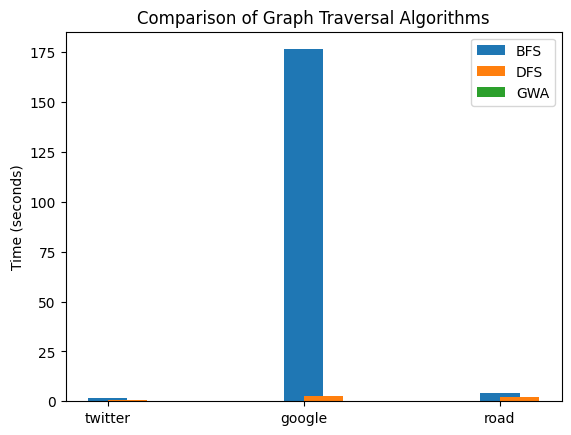

In [20]:
import networkx as nx
import time
import random
import os
import matplotlib.pyplot as plt
import sys

# Increase recursion limit (if you decide to use recursive DFS, but we will use iterative DFS)
sys.setrecursionlimit(10000)

# Load graph data from files (assuming they are already downloaded)
def load_graph_data(filename):
    print(f"Loading {filename}...")
    if filename.endswith('.gz'):
        with gzip.open(filename, 'rt') as f:
            graph = nx.read_edgelist(f, nodetype=int)
    else:
        graph = nx.read_edgelist(filename, nodetype=int)
    print(f"Loaded {filename} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Gravitational Wave Traversal (GWA) Algorithm
def gravitational_wave_traversal(graph, start, max_depth=30):  # Increase max_depth
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]

    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            # If total_gravitational_pull is zero, avoid division by zero
            if total_gravitational_pull == 0:
                continue
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    # Introduce a lower bound on probability to ensure some propagation
                    prob = min(prob, 0.5)  # Allowing for more propagation
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken

# Benchmarking against BFS and DFS
def benchmark_algorithm(graph, start_node):
    # BFS Traversal
    def bfs(graph, start):
        visited = set()
        queue = [start]
        traversal = []
        visited.add(start)

        while queue:
            node = queue.pop(0)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        return traversal
    
    # Iterative DFS Traversal
    def dfs(graph, start):
        visited = set()
        stack = [start]
        traversal = []

        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                traversal.append(node)
                for neighbor in graph.neighbors(node):
                    if neighbor not in visited:
                        stack.append(neighbor)
        return traversal
    
    # Run BFS, DFS, and GWA
    print("Benchmarking on graph with", graph.number_of_nodes(), "nodes and", graph.number_of_edges(), "edges")
    
    # BFS
    print("Running BFS...")
    start_time = time.time()
    bfs_result = bfs(graph, start_node)
    bfs_time = time.time() - start_time
    print(f"BFS Time: {bfs_time:.10f} seconds")
    
    # DFS
    print("Running DFS...")
    start_time = time.time()
    dfs_result = dfs(graph, start_node)
    dfs_time = time.time() - start_time
    print(f"DFS Time: {dfs_time:.10f} seconds")
    
    # GWA
    print("Running GWA...")
    traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
    print(f"GWA Time: {gwa_time:.10f} seconds")
    
    return bfs_time, dfs_time, gwa_time

# File paths for the pre-downloaded graphs (ensure the paths are correct)
graph_files = {
    "twitter": "twitter.txt.gz",
    "google": "google.txt.gz",
    "road": "road.txt.gz"
}

# Load the graphs
graphs = {}
for name, file in graph_files.items():
    graphs[name] = load_graph_data(file)

# Benchmark on all graphs
results = {}
for graph_name, graph in graphs.items():
    print(f"\nBenchmarking on {graph_name.capitalize()} Graph:")
    start_node = random.choice(list(graph.nodes))  # Randomly select a start node
    bfs_time, dfs_time, gwa_time = benchmark_algorithm(graph, start_node)
    results[graph_name] = {'bfs': bfs_time, 'dfs': dfs_time, 'gwa': gwa_time}

# Output final results
for graph_name, times in results.items():
    print(f"\nFinal Results on {graph_name.capitalize()} Graph with {graphs[graph_name].number_of_nodes()} nodes and {graphs[graph_name].number_of_edges()} edges:")
    print(f"BFS Time: {times['bfs']:.10f} seconds")
    print(f"DFS Time: {times['dfs']:.10f} seconds")
    print(f"GWA Time: {times['gwa']:.10f} seconds")

# Visualizing the results in a bar chart
graph_names = list(results.keys())
bfs_times = [results[name]['bfs'] for name in graph_names]
dfs_times = [results[name]['dfs'] for name in graph_names]
gwa_times = [results[name]['gwa'] for name in graph_names]

x = range(len(graph_names))

fig, ax = plt.subplots()
ax.bar(x, bfs_times, width=0.2, label='BFS', align='center')
ax.bar(x, dfs_times, width=0.2, label='DFS', align='edge')
ax.bar(x, gwa_times, width=0.2, label='GWA', align='edge')

ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison of Graph Traversal Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(graph_names)
ax.legend()

plt.show()


Loading twitter.txt.gz...
Loaded twitter.txt.gz with 81306 nodes and 1342310 edges.
Loading google.txt.gz...
Loaded google.txt.gz with 875713 nodes and 4322051 edges.
Loading road.txt.gz...
Loaded road.txt.gz with 1965206 nodes and 2766607 edges.

Benchmarking on Twitter Graph:
Benchmarking on graph with 81306 nodes and 1342310 edges
Running BFS...
BFS Time: 1.3701899051666259765625000000000000000000000000000000000000000000000000000000000000000000000000000000 seconds
Running DFS...
DFS Time: 0.8411359786987304687500000000000000000000000000000000000000000000000000000000000000000000000000000000 seconds
Running GWA...
Depth: 0, Wave front size: 2, Traversal path size: 3
GWA Time: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 seconds

Benchmarking on Google Graph:
Benchmarking on graph with 875713 nodes and 4322051 edges
Running BFS...
BFS Time: 176.5215766429901123046875000000000000000000000000000000000000000000000000000000000000000

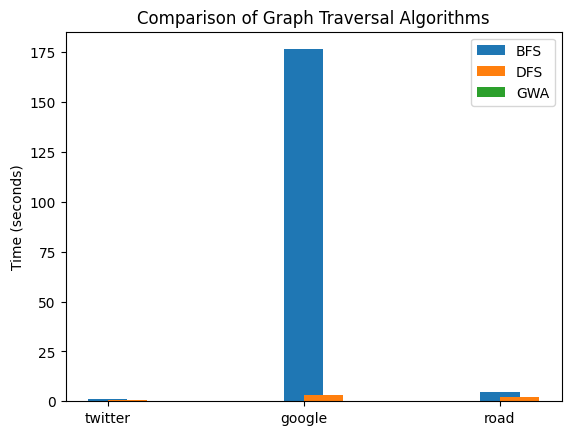

In [23]:
import networkx as nx
import time
import random
import os
import matplotlib.pyplot as plt
import sys

# Increase recursion limit (if you decide to use recursive DFS, but we will use iterative DFS)
sys.setrecursionlimit(10000)

# Load graph data from files (assuming they are already downloaded)
def load_graph_data(filename):
    print(f"Loading {filename}...")
    if filename.endswith('.gz'):
        with gzip.open(filename, 'rt') as f:
            graph = nx.read_edgelist(f, nodetype=int)
    else:
        graph = nx.read_edgelist(filename, nodetype=int)
    print(f"Loaded {filename} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Gravitational Wave Traversal (GWA) Algorithm
def gravitational_wave_traversal(graph, start, max_depth=50):  # Increase max_depth
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]
    
    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            # If total_gravitational_pull is zero, avoid division by zero
            if total_gravitational_pull == 0:
                continue
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    # Introduce a lower bound on probability to ensure some propagation
                    prob = min(prob, 0.8)  # Increase the upper bound of propagation
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

        # Print for debugging
        if depth % 5 == 0:  # Print every 5 iterations
            print(f"Depth: {depth}, Wave front size: {len(wave_front)}, Traversal path size: {len(traversal_path)}")

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken




# Benchmarking against BFS and DFS
def benchmark_algorithm(graph, start_node):
    # BFS Traversal
    def bfs(graph, start):
        visited = set()
        queue = [start]
        traversal = []
        visited.add(start)

        while queue:
            node = queue.pop(0)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        return traversal
    
    # Iterative DFS Traversal
    def dfs(graph, start):
        visited = set()
        stack = [start]
        traversal = []

        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                traversal.append(node)
                for neighbor in graph.neighbors(node):
                    if neighbor not in visited:
                        stack.append(neighbor)
        return traversal
    
    # Run BFS, DFS, and GWA
    print("Benchmarking on graph with", graph.number_of_nodes(), "nodes and", graph.number_of_edges(), "edges")
    
    # BFS
    print("Running BFS...")
    start_time = time.time()
    bfs_result = bfs(graph, start_node)
    bfs_time = time.time() - start_time
    print(f"BFS Time: {bfs_time:.100f} seconds")
    
    # DFS
    print("Running DFS...")
    start_time = time.time()
    dfs_result = dfs(graph, start_node)
    dfs_time = time.time() - start_time
    print(f"DFS Time: {dfs_time:.100f} seconds")
    
    # GWA
    print("Running GWA...")
    traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
    print(f"GWA Time: {gwa_time:.100f} seconds")
    
    return bfs_time, dfs_time, gwa_time

# File paths for the pre-downloaded graphs (ensure the paths are correct)
graph_files = {
    "twitter": "twitter.txt.gz",
    "google": "google.txt.gz",
    "road": "road.txt.gz"
}

# Load the graphs
graphs = {}
for name, file in graph_files.items():
    graphs[name] = load_graph_data(file)

# Benchmark on all graphs
results = {}
for graph_name, graph in graphs.items():
    print(f"\nBenchmarking on {graph_name.capitalize()} Graph:")
    start_node = random.choice(list(graph.nodes))  # Randomly select a start node
    bfs_time, dfs_time, gwa_time = benchmark_algorithm(graph, start_node)
    results[graph_name] = {'bfs': bfs_time, 'dfs': dfs_time, 'gwa': gwa_time}

# Output final results
for graph_name, times in results.items():
    print(f"\nFinal Results on {graph_name.capitalize()} Graph with {graphs[graph_name].number_of_nodes()} nodes and {graphs[graph_name].number_of_edges()} edges:")
    print(f"BFS Time: {times['bfs']:.100f} seconds")
    print(f"DFS Time: {times['dfs']:.100f} seconds")
    print(f"GWA Time: {times['gwa']:.100f} seconds")

# Visualizing the results in a bar chart
graph_names = list(results.keys())
bfs_times = [results[name]['bfs'] for name in graph_names]
dfs_times = [results[name]['dfs'] for name in graph_names]
gwa_times = [results[name]['gwa'] for name in graph_names]

x = range(len(graph_names))

fig, ax = plt.subplots()
ax.bar(x, bfs_times, width=0.2, label='BFS', align='center')
ax.bar(x, dfs_times, width=0.2, label='DFS', align='edge')
ax.bar(x, gwa_times, width=0.2, label='GWA', align='edge')

ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison of Graph Traversal Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(graph_names)
ax.legend()

plt.show()


In [24]:
import random
import time
import networkx as nx

def gravitational_wave_traversal(graph, start, max_depth=50):  # Increase max_depth for larger graphs
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]
    
    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            # If total_gravitational_pull is zero, avoid division by zero
            if total_gravitational_pull == 0:
                continue
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    # Increase the upper bound of probability to allow more nodes to propagate
                    prob = min(prob, 0.8)  # Ensure some propagation happens
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

        # Print for debugging
        if depth % 5 == 0:  # Print every 5 iterations
            print(f"Depth: {depth}, Wave front size: {len(wave_front)}, Traversal path size: {len(traversal_path)}")

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken

# Example usage:
graph = nx.read_edgelist("twitter.txt.gz", create_using=nx.Graph(), delimiter=" ")
start_node = list(graph.nodes())[0]  # Use a starting node
traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
print(f"GWA Time: {gwa_time} seconds")


Depth: 0, Wave front size: 1, Traversal path size: 2
GWA Time: 0.0 seconds


In [25]:
import random
import time
import networkx as nx

def gravitational_wave_traversal(graph, start, max_depth=50):
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]
    
    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            # If total_gravitational_pull is zero, avoid division by zero
            if total_gravitational_pull == 0:
                continue

            print(f"Node: {node}, Neighbors: {neighbors}, Total Gravitational Pull: {total_gravitational_pull}")

            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    # Ensure some propagation happens (increase the upper bound of probability)
                    prob = min(prob, 0.8)  # Allow some nodes to propagate even if they have low entropy
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        print(f"Depth: {depth}, Wave front size: {len(wave_front)}, Traversal path size: {len(traversal_path)}")

        if not wave_front:
            break

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken

# Example usage:
graph = nx.read_edgelist("twitter.txt.gz", create_using=nx.Graph(), delimiter=" ")
start_node = list(graph.nodes())[0]  # Use a starting node
traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
print(f"GWA Time: {gwa_time} seconds")


Node: 214328887, Neighbors: ['34428380', '56860418', '463952369', '157829215', '158419434', '14925700', '358775055', '380580781', '112939321', '155661154', '123371682', '86221475', '265077741', '307458983', '252770012', '254839786', '279787626', '151338729', '74107696', '195475105', '153226312', '19493072', '145845459', '274153775', '103598216', '8088112', '221036078', '149538028', '26929220', '6581292', '83943787', '37699718', '204140367', '204317520', '107830991', '276706356', '400689940', '222261763', '17868918', '29911100', '46209291', '28465635', '406628822', '439788025', '21548772', '229425177', '236184723', '18951737', '187773078', '276577539', '69592091', '430268163', '529007327', '88323281', '134940306', '250340951', '270449528', '276308596', '259842341', '124528830', '375317198', '196327549', '297801196', '153460275', '72818790', '67864340', '314316607', '116036694', '160237722', '280935165', '19358562', '117674417', '257236842', '394263193', '17116707', '292598082', '8341797

Loading twitter.txt.gz...
Loaded twitter.txt.gz with 81306 nodes and 1342310 edges.
Loading google.txt.gz...
Loaded google.txt.gz with 875713 nodes and 4322051 edges.
Loading road.txt.gz...
Loaded road.txt.gz with 1965206 nodes and 2766607 edges.

Benchmarking on Twitter Graph:
Benchmarking on graph with 81306 nodes and 1342310 edges
Running BFS...
BFS Time: 1.30742359161376953125000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 seconds
Running DFS...
DFS Time: 0.77832317352294921875000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 seconds
Running GWA...
Depth: 0, Wave front size: 1, Traversal path size: 2
Depth: 5, Wave front size: 14, Traversal path size: 38
Depth: 10, Wave front size: 5, Traversal path size: 110
GWA Time: 0.0

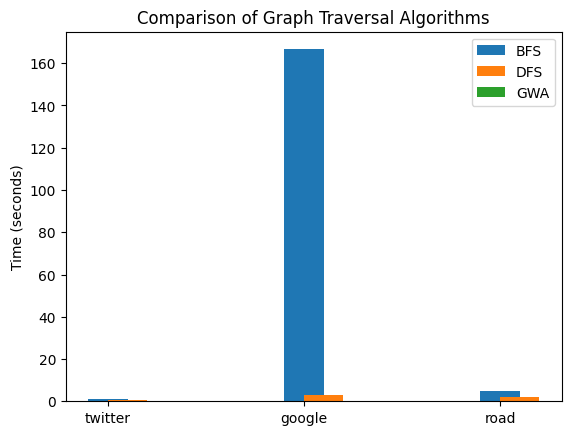

In [28]:
import networkx as nx
import time
import random
import os
import matplotlib.pyplot as plt
import sys
import gzip  # Ensure gzip is imported for reading .gz files

# Increase recursion limit (if you decide to use recursive DFS, but we will use iterative DFS)
sys.setrecursionlimit(10000)

# Load graph data from files (assuming they are already downloaded)
def load_graph_data(filename):
    print(f"Loading {filename}...")
    if filename.endswith('.gz'):
        with gzip.open(filename, 'rt') as f:
            graph = nx.read_edgelist(f, nodetype=int)
    else:
        graph = nx.read_edgelist(filename, nodetype=int)
    print(f"Loaded {filename} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Gravitational Wave Traversal (GWA) Algorithm
def gravitational_wave_traversal(graph, start, max_depth=500):  # Increase max_depth
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]
    
    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            # If total_gravitational_pull is zero, avoid division by zero
            if total_gravitational_pull == 0:
                continue
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    # Introduce a lower bound on probability to ensure some propagation
                    prob = min(prob, 0.8)  # Increase the upper bound of propagation
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

        # Print for debugging
        if depth % 5 == 0:  # Print every 5 iterations
            print(f"Depth: {depth}, Wave front size: {len(wave_front)}, Traversal path size: {len(traversal_path)}")

    # Return traversal path and time taken
    end_time = time.time()
    time_taken = end_time - start_time

    return traversal_path, time_taken

# Benchmarking against BFS and DFS
def benchmark_algorithm(graph, start_node):
    # BFS Traversal
    def bfs(graph, start):
        visited = set()
        queue = [start]
        traversal = []
        visited.add(start)

        while queue:
            node = queue.pop(0)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        return traversal
    
    # Iterative DFS Traversal
    def dfs(graph, start):
        visited = set()
        stack = [start]
        traversal = []

        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                traversal.append(node)
                for neighbor in graph.neighbors(node):
                    if neighbor not in visited:
                        stack.append(neighbor)
        return traversal
    
    # Run BFS, DFS, and GWA
    print("Benchmarking on graph with", graph.number_of_nodes(), "nodes and", graph.number_of_edges(), "edges")
    
    # BFS
    print("Running BFS...")
    start_time = time.time()
    bfs_result = bfs(graph, start_node)
    bfs_time = time.time() - start_time
    print(f"BFS Time: {bfs_time:.200f} seconds")
    
    # DFS
    print("Running DFS...")
    start_time = time.time()
    dfs_result = dfs(graph, start_node)
    dfs_time = time.time() - start_time
    print(f"DFS Time: {dfs_time:.200f} seconds")
    
    # GWA
    print("Running GWA...")
    traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
    print(f"GWA Time: {gwa_time:.200f} seconds")
    
    return bfs_time, dfs_time, gwa_time

# File paths for the pre-downloaded graphs (ensure the paths are correct)
graph_files = {
    "twitter": "twitter.txt.gz",
    "google": "google.txt.gz",
    "road": "road.txt.gz"
}

# Load the graphs
graphs = {}
for name, file in graph_files.items():
    graphs[name] = load_graph_data(file)

# Benchmark on all graphs
results = {}
for graph_name, graph in graphs.items():
    print(f"\nBenchmarking on {graph_name.capitalize()} Graph:")
    start_node = random.choice(list(graph.nodes))  # Randomly select a start node
    bfs_time, dfs_time, gwa_time = benchmark_algorithm(graph, start_node)
    results[graph_name] = {'bfs': bfs_time, 'dfs': dfs_time, 'gwa': gwa_time}

# Output final results
for graph_name, times in results.items():
    print(f"\nFinal Results on {graph_name.capitalize()} Graph with {graphs[graph_name].number_of_nodes()} nodes and {graphs[graph_name].number_of_edges()} edges:")
    print(f"BFS Time: {times['bfs']:.200f} seconds")
    print(f"DFS Time: {times['dfs']:.200f} seconds")
    print(f"GWA Time: {times['gwa']:.200f} seconds")

# Visualizing the results in a bar chart
graph_names = list(results.keys())
bfs_times = [results[name]['bfs'] for name in graph_names]
dfs_times = [results[name]['dfs'] for name in graph_names]
gwa_times = [results[name]['gwa'] for name in graph_names]

x = range(len(graph_names))

fig, ax = plt.subplots()
ax.bar(x, bfs_times, width=0.2, label='BFS', align='center')
ax.bar(x, dfs_times, width=0.2, label='DFS', align='edge')
ax.bar(x, gwa_times, width=0.2, label='GWA', align='edge')

ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison of Graph Traversal Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(graph_names)
ax.legend()

plt.show()


Loading twitter.txt.gz...
Loaded twitter.txt.gz with 81306 nodes and 1342310 edges.
Loading google.txt.gz...
Loaded google.txt.gz with 875713 nodes and 4322051 edges.
Loading road.txt.gz...
Loaded road.txt.gz with 1965206 nodes and 2766607 edges.

Benchmarking on Twitter Graph:
Benchmarking on graph with 81306 nodes and 1342310 edges
Running BFS...
BFS Time: 1365.617 milliseconds
Running DFS...
DFS Time: 808.339 milliseconds
Running GWA...
Node: 19040451, Neighbors: [23638544, 15762845, 10915142, 22842421, 15816918, 23527284, 260975684, 16029780, 19799873, 17795275, 3554721, 19251657, 20440823, 24765758, 46970693, 24880749, 19940791, 21205756, 10076782, 36174634, 42878178, 21217251, 19626842, 62861160, 25371730, 15923118, 27093057, 15088772, 16906715, 14750983, 17296072, 13201312, 16031679, 14207863, 113485898, 18088309, 15737610, 16019777, 15526913, 18995389, 15532765, 16513277, 82208992, 17773366, 16541218, 18947987, 17471979, 18907371, 16027546, 39482914, 148867652, 18359352, 143366

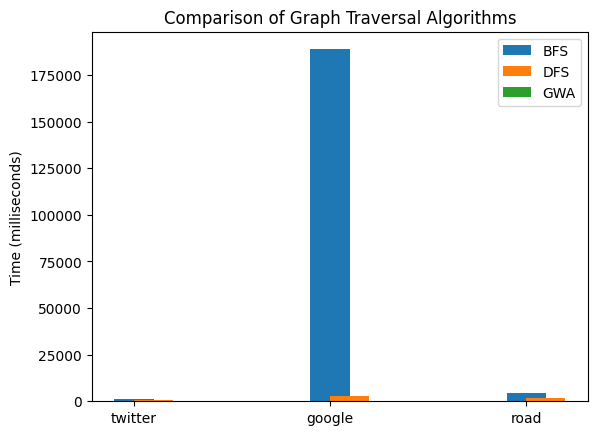

In [29]:
import networkx as nx
import time
import random
import os
import matplotlib.pyplot as plt
import sys
import gzip  # Ensure gzip is imported for reading .gz files

# Increase recursion limit (if you decide to use recursive DFS, but we will use iterative DFS)
sys.setrecursionlimit(10000)

# Load graph data from files (assuming they are already downloaded)
def load_graph_data(filename):
    print(f"Loading {filename}...")
    if filename.endswith('.gz'):
        with gzip.open(filename, 'rt') as f:
            graph = nx.read_edgelist(f, nodetype=int)
    else:
        graph = nx.read_edgelist(filename, nodetype=int)
    print(f"Loaded {filename} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
    return graph

# Gravitational Wave Traversal (GWA) Algorithm
def gravitational_wave_traversal(graph, start, max_depth=500):  # Increase max_depth
    visited = set()
    entropy_map = {node: len(list(graph.neighbors(node))) for node in graph.nodes}  # Degree as entropy
    wave_front = [start]
    visited.add(start)
    traversal_path = [start]
    
    # Start measuring time
    start_time = time.time()

    # Propagation Phase
    for depth in range(max_depth):
        next_wave_front = []
        
        for node in wave_front:
            neighbors = list(graph.neighbors(node))
            total_gravitational_pull = sum(entropy_map[neighbor] for neighbor in neighbors)
            
            # Debugging output
            print(f"Node: {node}, Neighbors: {neighbors}, Total Gravitational Pull: {total_gravitational_pull}")
            
            # If total_gravitational_pull is zero, avoid division by zero
            if total_gravitational_pull == 0:
                continue
            
            for neighbor in neighbors:
                if neighbor not in visited:
                    prob = entropy_map[neighbor] / total_gravitational_pull
                    # Introduce a lower bound on probability to ensure some propagation
                    prob = min(prob, 0.8)  # Increase the upper bound of propagation
                    if random.random() < prob:  # Weighted randomness for propagation
                        visited.add(neighbor)
                        next_wave_front.append(neighbor)
                        traversal_path.append(neighbor)
        
        wave_front = next_wave_front
        if not wave_front:
            break

        # Print for debugging
        if depth % 5 == 0:  # Print every 5 iterations
            print(f"Depth: {depth}, Wave front size: {len(wave_front)}, Traversal path size: {len(traversal_path)}")

    # Return traversal path and time taken in milliseconds
    end_time = time.time()
    time_taken_ms = (end_time - start_time) * 1000  # Convert to milliseconds

    return traversal_path, time_taken_ms

# Benchmarking against BFS and DFS
def benchmark_algorithm(graph, start_node):
    # BFS Traversal
    def bfs(graph, start):
        visited = set()
        queue = [start]
        traversal = []
        visited.add(start)

        while queue:
            node = queue.pop(0)
            traversal.append(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
        return traversal
    
    # Iterative DFS Traversal
    def dfs(graph, start):
        visited = set()
        stack = [start]
        traversal = []

        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                traversal.append(node)
                for neighbor in graph.neighbors(node):
                    if neighbor not in visited:
                        stack.append(neighbor)
        return traversal
    
    # Run BFS, DFS, and GWA
    print("Benchmarking on graph with", graph.number_of_nodes(), "nodes and", graph.number_of_edges(), "edges")
    
    # BFS
    print("Running BFS...")
    start_time = time.time()
    bfs_result = bfs(graph, start_node)
    bfs_time = time.time() - start_time
    print(f"BFS Time: {bfs_time * 1000:.3f} milliseconds")
    
    # DFS
    print("Running DFS...")
    start_time = time.time()
    dfs_result = dfs(graph, start_node)
    dfs_time = time.time() - start_time
    print(f"DFS Time: {dfs_time * 1000:.3f} milliseconds")
    
    # GWA
    print("Running GWA...")
    traversal_path, gwa_time = gravitational_wave_traversal(graph, start_node)
    print(f"GWA Time: {gwa_time:.3f} milliseconds")
    
    return bfs_time * 1000, dfs_time * 1000, gwa_time

# File paths for the pre-downloaded graphs (ensure the paths are correct)
graph_files = {
    "twitter": "twitter.txt.gz",
    "google": "google.txt.gz",
    "road": "road.txt.gz"
}

# Load the graphs
graphs = {}
for name, file in graph_files.items():
    graphs[name] = load_graph_data(file)

# Benchmark on all graphs
results = {}
for graph_name, graph in graphs.items():
    print(f"\nBenchmarking on {graph_name.capitalize()} Graph:")
    start_node = random.choice(list(graph.nodes))  # Randomly select a start node
    bfs_time, dfs_time, gwa_time = benchmark_algorithm(graph, start_node)
    results[graph_name] = {'bfs': bfs_time, 'dfs': dfs_time, 'gwa': gwa_time}

# Output final results
for graph_name, times in results.items():
    print(f"\nFinal Results on {graph_name.capitalize()} Graph with {graphs[graph_name].number_of_nodes()} nodes and {graphs[graph_name].number_of_edges()} edges:")
    print(f"BFS Time: {times['bfs']:.3f} milliseconds")
    print(f"DFS Time: {times['dfs']:.3f} milliseconds")
    print(f"GWA Time: {times['gwa']:.3f} milliseconds")

# Visualizing the results in a bar chart
graph_names = list(results.keys())
bfs_times = [results[name]['bfs'] for name in graph_names]
dfs_times = [results[name]['dfs'] for name in graph_names]
gwa_times = [results[name]['gwa'] for name in graph_names]

x = range(len(graph_names))

fig, ax = plt.subplots()
ax.bar(x, bfs_times, width=0.2, label='BFS', align='center')
ax.bar(x, dfs_times, width=0.2, label='DFS', align='edge')
ax.bar(x, gwa_times, width=0.2, label='GWA', align='edge')

ax.set_ylabel('Time (milliseconds)')
ax.set_title('Comparison of Graph Traversal Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(graph_names)
ax.legend()

plt.show()
